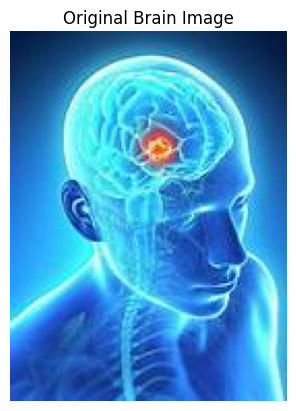

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the original brain image
image_path = '/content/brain0.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR (OpenCV default) to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Original Brain Image")
plt.axis('off')
plt.show()


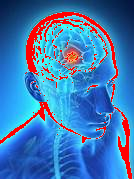

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the segmented image
image = cv2.imread('/content/brain0.jpeg')

# Convert to grayscale if needed
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the color change (e.g., changing white areas to red)
mask = gray > 200  # Assuming tumor areas are bright
image[mask] = [0, 0, 255]  # Change to red (BGR format)

# Save or display the modified image
cv2.imwrite('modified_segmentation.png', image)
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
# The lines below are causing the issue in Colab environment.
# cv2.waitKey(0)
# cv2.destroyAllWindows()

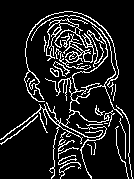

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the segmented image
image = cv2.imread('/content/brain0.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Save or display the edge-detected image
cv2.imwrite('tumor_edges.png', edges)
# Use cv2_imshow instead of cv2.imshow
cv2_imshow(edges)
# cv2.imshow('Edge Detection', edges)
# cv2.waitKey(0)  # Remove or comment out this line
# cv2.destroyAllWindows() # Remove or comment out this line

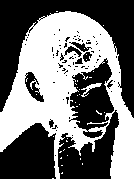

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the segmented image
image = cv2.imread('/content/brain0.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Save or display the thresholded image
cv2.imwrite('thresholded_tumor.png', thresholded)
cv2_imshow(thresholded)  # Use cv2_imshow instead of cv2.imshow
# cv2.imshow('Thresholded Image', thresholded)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

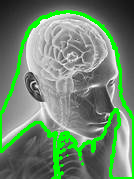

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the segmented image
image = cv2.imread('/content/brain0.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert grayscale image to BGR for visualization
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours on the image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours

# Save or display the contoured image
cv2.imwrite('contoured_tumor.png', contour_image)
# Use cv2_imshow instead of cv2.imshow
cv2_imshow(contour_image)
# cv2.imshow('Contoured Tumor', contour_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

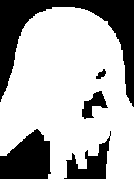

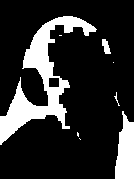

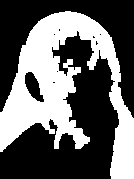

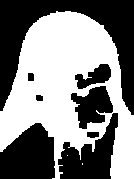

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the segmented image
image = cv2.imread('/content/brain0.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations
dilated = cv2.dilate(binary_image, kernel, iterations=2)  # Expands tumor regions
eroded = cv2.erode(binary_image, kernel, iterations=2)  # Shrinks tumor regions
opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)  # Removes noise
closed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)  # Fills gaps

# Save or display the processed images
cv2.imwrite('dilated_tumor.png', dilated)
cv2.imwrite('eroded_tumor.png', eroded)
cv2.imwrite('opened_tumor.png', opened)
cv2.imwrite('closed_tumor.png', closed)

# Replace cv2.imshow with cv2_imshow for Colab compatibility
cv2_imshow(dilated)  # Display dilated image using cv2_imshow
cv2_imshow(eroded)  # Display eroded image using cv2_imshow
cv2_imshow(opened)  # Display opened image using cv2_imshow
cv2_imshow(closed)  # Display closed image using cv2_imshow

# cv2.waitKey(0)  # Remove or comment out this line
# cv2.destroyAllWindows()  # Remove or comment out this line

Edge detection test passed successfully!


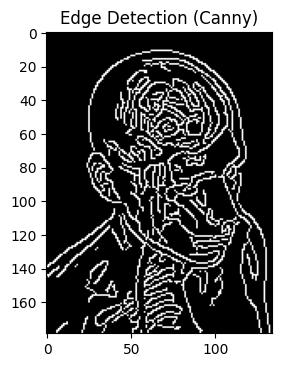

In [ ]:
# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to test edge detection
def test_edge_detection(image_path):
    original_image, edge_detected_image = detect_edges(image_path)

    # Check if the output is a valid image
    assert original_image is not None, "Error: Original image not loaded correctly."
    assert edge_detected_image is not None, "Error: Edge detection failed."

    # Check if the edge-detected image has the same dimensions as the original
    assert original_image.shape == edge_detected_image.shape, "Error: Image dimensions mismatch."

    print("Edge detection test passed successfully!")



    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/brain0.jpeg"  # Replace with actual MRI image path
test_edge_detection(image_path)